# HW7 APIs - MTA API 

#### Authors: Ling Lin, Xuanyu Lu, Qingyang Xiao

Reference: https://github.com/nolanbconaway/underground

In [1]:
import os

from underground import metadata, SubwayFeed #get metadata and SubwayFeed function


In [2]:
API_KEY = '01963ec1af3debf61e88968928b647c2' 

ROUTE = 'Q' #the route information we want to see

#API_KEY = '5H3pxsm5LT8OwtBs9LWoWaNGf0j67zER1dxQL214'
#ROUTE = 'Q'


In [3]:
FEED_ID = metadata.get_feed_id(ROUTE) #get route Feed

In [4]:
feed = SubwayFeed.get(FEED_ID, api_key=API_KEY)
#feed = SubwayFeed.get(ROUTE, api_key=API_KEY)

In [5]:
q_train_stops = feed.extract_stop_dict()[ROUTE] #get route raw data of stops_id and expected arrival time

In [6]:
q_train_stops #print q train information

{'B08N': [datetime.datetime(2020, 4, 8, 0, 30, 26, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 0, 38, 26, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 37, 30, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 16, 56, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 57, 30, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 2, 17, 30, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)],
 'Q03N': [datetime.datetime(2020, 4, 8, 0, 32, 26, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 0, 40, 26, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 39, 30, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 18, 56, tzinfo=<DstTzInfo 'US/Eastern' 

### Transform online data into python dataframe

References Used:
1. https://thispointer.com/pandas-convert-dataframe-index-into-column-using-dataframe-reset_index-in-python/
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
3. https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
4. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

In [7]:
import pandas as pd

In [8]:
# Convert online data from dictionary format into python dataframe

Schedule = pd.DataFrame.from_dict(q_train_stops, orient='index')

In [9]:
# Uncomment to see what the original dataframe looks like

Schedule

,0,1,2,3,4,5
B08N,2020-04-08 00:30:26-04:00,2020-04-08 00:38:26-04:00,2020-04-08 01:37:30-04:00,2020-04-08 01:16:56-04:00,2020-04-08 01:57:30-04:00,2020-04-08 02:17:30-04:00
Q03N,2020-04-08 00:32:26-04:00,2020-04-08 00:40:26-04:00,2020-04-08 01:39:30-04:00,2020-04-08 01:18:56-04:00,2020-04-08 01:59:30-04:00,2020-04-08 02:19:30-04:00
Q04N,2020-04-08 00:36:41-04:00,2020-04-08 00:44:41-04:00,2020-04-08 01:43:45-04:00,2020-04-08 01:23:11-04:00,2020-04-08 02:03:45-04:00,2020-04-08 02:23:45-04:00
Q05N,2020-04-08 00:40:26-04:00,2020-04-08 00:48:26-04:00,2020-04-08 01:47:30-04:00,2020-04-08 01:26:56-04:00,2020-04-08 02:07:30-04:00,2020-04-08 02:27:30-04:00
R17N,2020-04-08 00:30:26-04:00,2020-04-08 01:29:30-04:00,2020-04-08 01:08:56-04:00,2020-04-08 01:49:30-04:00,2020-04-08 02:09:30-04:00,NaT
...,...,...,...,...,...,...
R16S,2020-04-08 00:57:00-04:00,2020-04-08 01:17:00-04:00,2020-04-08 01:37:00-04:00,NaT,NaT,NaT
R17S,2020-04-08 00:58:30-04:00,2020-04-08 01:18:30-04:00,2020-04-08 01:38:30-04:00,NaT,NaT,NaT
R18S,2020-04-08 00:59:30-04:00,2020-04-08 01:19:30-04:00,2020-04-08 01:39:30-04:00,NaT,NaT,NaT
R19S,2020-04-08 01:00:30-04:00,2020-04-08 01:20:30-04:00,2020-04-08 01:40:30-04:00,NaT,NaT,NaT


In [10]:
# Add the index to be a new column in dataframe
# The original index is stop_id, so add stop_id to be a new column of dataframe

Schedule1 = Schedule.reset_index()

# Rename the newly added column as "stop_id"
Schedule2 = Schedule1.rename(columns={'index':'stop_id'})


# Read the last character of stop_id to identify the direction, N represents North, S represents South
Direction = []

for i in range(0, len(Schedule)):
    Direction.append(Schedule2.stop_id[i][-1])
        
# Direction

# Insert the new direction column to a specific postion, e.g. position 1 in this case
# Do not run this code the second time without rerun the above codes, 
# because it will appear an error if the column is already inserted 

Schedule2.insert(1, 'direction', Direction)

# Extract date information from the Timestamp column, create a new column and insert it to position 2
Schedule2.insert(2, 'date', Schedule2[0].dt.date)


# Another way of adding a new column to dataframe, but no specific position
# Schedule2['direction'] = Direction
# Schedule2['date'] = Schedule2[0].dt.date


# Replace the original Timestamp columns (Timestamp shows date and time) with time only

for j in range(0, len(Schedule2)):                # loop through rows
    for k in range(3, len(Schedule2.iloc[0])):       # loop through columns 
        if pd.notna(Schedule2.iloc[j, k]):              # Checking for missing value
            Schedule2.iloc[j, k] = pd.Timestamp.time(Schedule2.iloc[j, k])
            
            
# Another approach, work with dataframe that doesn't have NAs 
# Schedule2[0] = Schedule2[0].dt.time


In [11]:
# Uncomment to see what the new dataframe looks like now

Schedule2

,stop_id,direction,date,0,1,2,3,4,5
0,B08N,N,2020-04-08,00:30:26,00:38:26,01:37:30,01:16:56,01:57:30,02:17:30
1,Q03N,N,2020-04-08,00:32:26,00:40:26,01:39:30,01:18:56,01:59:30,02:19:30
2,Q04N,N,2020-04-08,00:36:41,00:44:41,01:43:45,01:23:11,02:03:45,02:23:45
3,Q05N,N,2020-04-08,00:40:26,00:48:26,01:47:30,01:26:56,02:07:30,02:27:30
4,R17N,N,2020-04-08,00:30:26,01:29:30,01:08:56,01:49:30,02:09:30,NaT
...,...,...,...,...,...,...,...,...,...
63,R16S,S,2020-04-08,00:57:00,01:17:00,01:37:00,NaT,NaT,NaT
64,R17S,S,2020-04-08,00:58:30,01:18:30,01:38:30,NaT,NaT,NaT
65,R18S,S,2020-04-08,00:59:30,01:19:30,01:39:30,NaT,NaT,NaT
66,R19S,S,2020-04-08,01:00:30,01:20:30,01:40:30,NaT,NaT,NaT


<font size='4' color='red'>Qingyang part</font>

In [12]:
sch_df = Schedule2

In [13]:
#show top 10 time nearest station info
sch_df.head(10)

,stop_id,direction,date,0,1,2,3,4,5
0,B08N,N,2020-04-08,00:30:26,00:38:26,01:37:30,01:16:56,01:57:30,02:17:30
1,Q03N,N,2020-04-08,00:32:26,00:40:26,01:39:30,01:18:56,01:59:30,02:19:30
2,Q04N,N,2020-04-08,00:36:41,00:44:41,01:43:45,01:23:11,02:03:45,02:23:45
3,Q05N,N,2020-04-08,00:40:26,00:48:26,01:47:30,01:26:56,02:07:30,02:27:30
4,R17N,N,2020-04-08,00:30:26,01:29:30,01:08:56,01:49:30,02:09:30,NaT
5,R16N,N,2020-04-08,00:31:56,01:31:00,01:10:26,01:51:00,02:11:00,NaT
6,R15N,N,2020-04-08,00:33:56,01:33:00,01:12:26,01:53:00,02:13:00,NaT
7,R14N,N,2020-04-08,00:35:56,01:35:00,01:14:26,01:55:00,02:15:00,NaT
8,R21S,S,2020-04-08,00:30:26,01:03:30,01:23:30,01:43:30,NaT,NaT
9,R22S,S,2020-04-08,00:31:56,01:05:00,01:25:00,01:45:00,NaT,NaT


In [14]:
for i in range(10):
    sch_df.iloc[i]['stop_id']

In [15]:
#find top 10 time nearest stops
stop = []
for i in range(20):
    stop.append(sch_df.iloc[i]['stop_id'])
#stop = [sch_df.iloc[0]['stop_id'],sch_df.iloc[1]['stop_id']]
print(stop)
#stop = list.append('sch_df.iloc[0]['stop_id']')

['B08N', 'Q03N', 'Q04N', 'Q05N', 'R17N', 'R16N', 'R15N', 'R14N', 'R21S', 'R22S', 'Q01S', 'R30S', 'D24S', 'D25S', 'D26S', 'D27S', 'D28S', 'D29S', 'D30S', 'D31S']


In [16]:
!more stops.txt

stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
101,,Van Cortlandt Park - 242 St,,40.889248,-73.898583,,,1,
101N,,Van Cortlandt Park - 242 St,,40.889248,-73.898583,,,0,101
101S,,Van Cortlandt Park - 242 St,,40.889248,-73.898583,,,0,101
103,,238 St,,40.884667,-73.90087,,,1,
103N,,238 St,,40.884667,-73.90087,,,0,103
103S,,238 St,,40.884667,-73.90087,,,0,103
104,,231 St,,40.878856,-73.904834,,,1,
104N,,231 St,,40.878856,-73.904834,,,0,104
104S,,231 St,,40.878856,-73.904834,,,0,104
106,,Marble Hill - 225 St,,40.874561,-73.909831,,,1,
106N,,Marble Hill - 225 St,,40.874561,-73.909831,,,0,106
106S,,Marble Hill - 225 St,,40.874561,-73.909831,,,0,106
107,,215 St,,40.869444,-73.915279,,,1,
107N,,215 St,,40.869444,-73.915279,,,0,107
107S,,215 St,,40.869444,-73.915279,,,0,107
108,,207 St,,40.864621,-73.918822,,,1,
108N,,207 St,,40.864621,-73.918822,,,0,108
108S,,207 St,,40.864621,-73.918822,,,0,108
109,,Dyckman St,,40.860531,-73.925536,,,1,
109

In [17]:
coord_df = pd.read_csv('stops.txt')
print(coord_df)

     stop_id  stop_code                    stop_name  stop_desc   stop_lat  \
0        101        NaN  Van Cortlandt Park - 242 St        NaN  40.889248   
1       101N        NaN  Van Cortlandt Park - 242 St        NaN  40.889248   
2       101S        NaN  Van Cortlandt Park - 242 St        NaN  40.889248   
3        103        NaN                       238 St        NaN  40.884667   
4       103N        NaN                       238 St        NaN  40.884667   
...      ...        ...                          ...        ...        ...   
1498    S30N        NaN                Tompkinsville        NaN  40.636949   
1499    S30S        NaN                Tompkinsville        NaN  40.636949   
1500     S31        NaN                    St George        NaN  40.643748   
1501    S31N        NaN                    St George        NaN  40.643748   
1502    S31S        NaN                    St George        NaN  40.643748   

       stop_lon  zone_id  stop_url  location_type parent_statio

In [33]:
#find stops name

stop_name = []

for i in range(10):
    stop_name.append(coord_df.loc[coord_df['stop_id'] == stop[i],'stop_name'].values[0][0:20])
print(stop_name)

['Lexington Av/63 St', '72 St', '86 St', '96 St', '34 St - Herald Sq', 'Times Sq - 42 St', '49 St', '57 St - 7 Av', '8 St - NYU', 'Prince St']


In [19]:
#find latitude and longtitude of these 10 stops

x_lat = []

for i in range(10):
    x_lat.append(coord_df.loc[coord_df['stop_id'] == stop[i],'stop_lat'].values[0])
print(x_lat)

[40.764629, 40.768799, 40.777891, 40.784318, 40.749567, 40.754672, 40.759901, 40.764664, 40.730328, 40.724329]


In [20]:
#find longtitude of these 10 stops

x_lon = []

for i in range(10):
    x_lon.append(coord_df.loc[coord_df['stop_id'] == stop[i],'stop_lon'].values[0])
print(x_lon)

[-73.966113, -73.958424, -73.951787, -73.947152, -73.98795, -73.986754, -73.984139, -73.98065799999999, -73.99262900000001, -73.997702]


In [21]:
from datetime import date
from datetime import datetime

In [24]:
#calculate nearest waiting time btw top 2 trains in minutes for this train at these 10 stops
#sch_df.iloc[0].values[3]

#time_st = mean(sch_df.iloc[i].values[3])

lag_min = []

for i in range(10):
    dt1 = datetime.combine(date.today(), sch_df.iloc[i].values[3])
    dt2 = datetime.combine(date.today(), sch_df.iloc[i].values[4])
    #dt3 = datetime.combine(date.today(), sch_df.iloc[i].values[5])
    #lag_min = ((dt2 - dt1).total_seconds()+(dt3 - dt2).total_seconds())/2
    #lag_min = (dt2 - dt1).total_seconds()/60
    sec1 = dt2 - dt1
    lag = sec1.total_seconds()/60
    #print (lag_min)
    lag_min.append(lag)
print (lag_min)


[8.0, 8.0, 8.0, 8.0, 59.06666666666667, 59.06666666666667, 59.06666666666667, 59.06666666666667, 33.06666666666667, 33.06666666666667]


In [25]:
#def double(lst):
#    return [i*2 for i in lst]

In [26]:
#print (double(lag_min))

### Data Visulization

References
- https://stackoverflow.com/questions/43757820/how-to-add-a-variable-to-python-plt-title
- https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

This plot illustrates the time gap between train arrivals for a pre-identified stop.

In [27]:
# Use a "magic command" to specify how we want our plots displayed
# %matplotlib notebook show dynamic/interactive plot

%matplotlib notebook
import matplotlib.pyplot as plt
#import matplotlib.dates 


<font size='4' color='red'>Qingyang part</font>

<IPython.core.display.Javascript object>


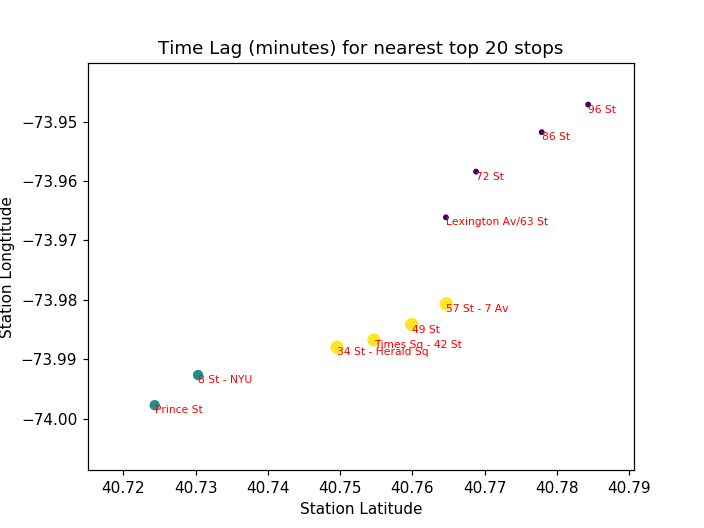

Text(0.5, 0, 'Station Latitude')

In [42]:
plt.title ('Time Lag (minutes) for nearest top 20 stops')
#plt.scatter (x_lat, x_lon, s = lag_min);

#different color
colors = []
for i in range (10):
    colors . append ( lag_min [i]/float(max(lag_min)))

plt.scatter(x_lat, x_lon ,s = lag_min, c=colors , alpha =1);

#add text
for i in range (10):
    myx = x_lat[i]
    myy = x_lon[i]
    mystop = stop_name [i]
    plt. text (myx , myy , mystop , color ="red", fontsize =7,horizontalalignment='left',verticalalignment='top')
    
# x and y labels
plt.ylabel('Station Longtitude')
plt.xlabel('Station Latitude')

<font size='4' color='blue'>Ling part</font>

In [43]:
# Identify the stop_id that we wish to search
# In this case, we use stop 'Q05N' as the pre-identified stop

id = 'Q05N'

In [44]:
# Find the index that associates with the corresponding stop
index = int(Schedule2.index[Schedule2['stop_id'] == id].values)

# Find the schedule of that stop
times = Schedule2.iloc[index]

# Drop the NAs in the data
y = times.dropna()[3::]

# Set the x-values
x = range(0, len(y), 1)

<IPython.core.display.Javascript object>


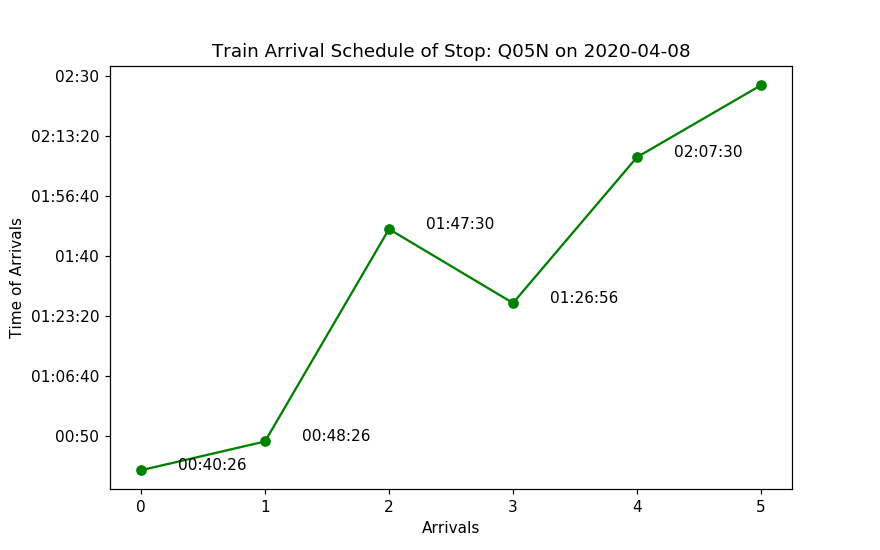

In [45]:
# Plot size
plt.figure(figsize=(8, 5))

# Plot title
plt.title('Train Arrival Schedule of Stop: '+str(id)+' on '+str(times['date']))

# x and y labels
plt.ylabel('Time of Arrivals')
plt.xlabel('Arrivals')

# Line plot
pd.plotting.register_matplotlib_converters()
plt.plot(x, y, 'go-')

# Lable points
for i, txt in enumerate(y):
    plt.annotate(txt, (x[i]+0.3, y[i]))

# Save plot as a png. image
plt.savefig('MTA_Plot1.png')

plt.show()